## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')
ds = pd.read_csv('titanic.csv')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [8]:
print("Основна статистична інформація:")
print(ds.describe())

print("\nРозмірність датасету:")
print(ds.shape)

print("\nТипи змінних і кількість даних:")
print(ds.info())

Основна статистична інформація:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмірність датасету:
(891, 12)

Типи змінних і 

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [9]:
missing_values = ds.isnull().sum()

print("\nКількість пропущених значень по кожному атрибуту:")
print(missing_values)


Кількість пропущених значень по кожному атрибуту:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Найбільше пропущених значень у атрибуті Cabin - 687. Далі у колонці Age - 177  і 2 у Embarked. Найбільш критичним є кількість пропущених значень у атрибуті Cabin, тому буде доцільно видалити її.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



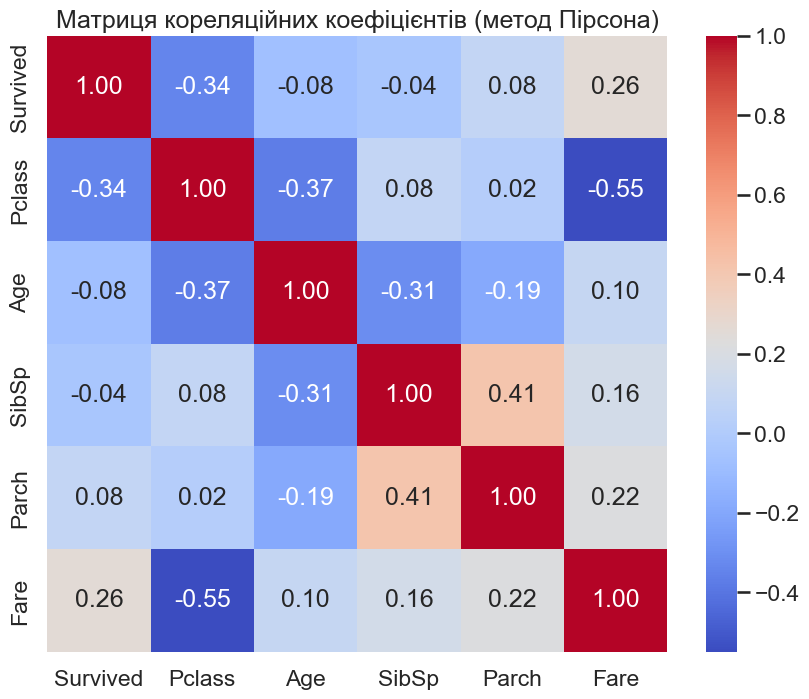

In [10]:

ds_correlation = ds.drop(columns=['PassengerId','Name','Sex','Embarked','Ticket','Cabin'])
correlation_matrix = ds_correlation.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця кореляційних коефіцієнтів (метод Пірсона)")
plt.show()

Ваші висновки:

Ми бачимо, що багато значень прямують до 0, що означає відсутність сильної залежності між даними. Клас пасажира має хорошу залежність з вижившими пасажирами. Залежність між класом пасажира і вартістю квитка є найбільшою і скоріш за все буде впилвати на подальший аналіз даних. 

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [11]:

def fill_missing_values(dataset, column, group_columns):

    grouped_df = dataset.groupby(group_columns)[column]
    
    median_values = grouped_df.transform('median')

    dataset[column] = dataset[column].fillna(median_values)

    return dataset

print("Missing values in Age before:", ds['Age'].isnull().sum())

proccesed_ds = fill_missing_values(ds, 'Age', ['Sex', 'Pclass'])

print("Missing values in Age after:", proccesed_ds['Age'].isnull().sum())
ds.isnull().sum()


Missing values in Age before: 177
Missing values in Age after: 0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

Середній вік пасажирів змінився, але не суттєво. Тому ми можемо припустити що дані заповнились правильно.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\1824537702.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age_bin = ds.groupby('Age_bin')['Survived'].sum()


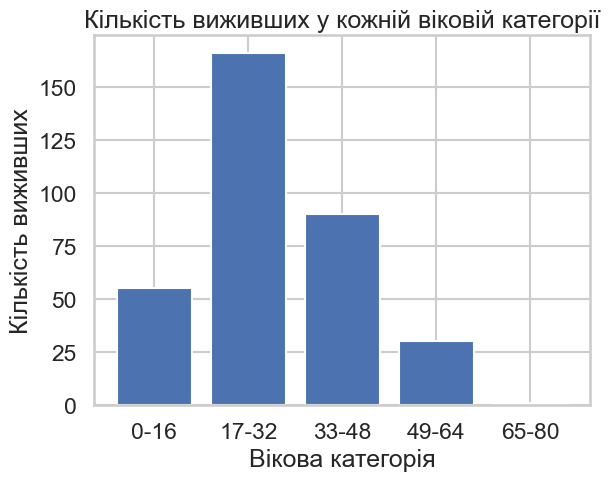

In [12]:
import matplotlib.pyplot as plt

bins = [0, 16, 32, 48, 64, 80]

ds['Age_bin'] = pd.cut(ds['Age'], bins, labels=[0, 1, 2, 3, 4])

survived_by_age_bin = ds.groupby('Age_bin')['Survived'].sum()

plt.bar(survived_by_age_bin.index, survived_by_age_bin.values)
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість виживших')
plt.title('Кількість виживших у кожній віковій категорії')
plt.xticks(range(len(bins)-1), ['0-16', '17-32', '33-48', '49-64', '65-80'])
plt.show()

Ваші висновки:

Найбільше пасажирів вижило з 2 вікової категорії (17-32 років), а найменше з 5 категорії (65-80 років), це може також означати, що людей 5 вікової категорії було найменше.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27660\293251358.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_counts = ds.groupby('fare_quartile')['Survived'].value_counts()


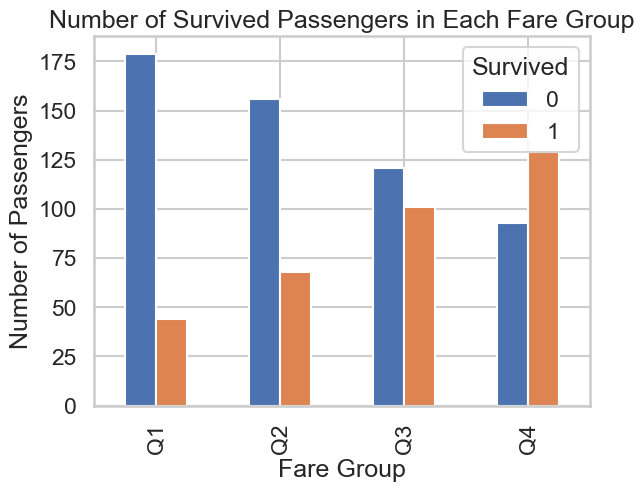

In [13]:
ds['fare_quartile'] = pd.qcut(ds['Fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

fare_group_counts = ds.groupby('fare_quartile')['Survived'].value_counts()


fare_group_counts.unstack().plot(kind='bar')
plt.title('Number of Survived Passengers in Each Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Number of Passengers')
plt.show()

Ваші висновки:

Найбільше людей вижило в останній - четвертій категорії, в якій ціна квитків найбільша. Найбільше людей загиноло тих, у кого квитки були найдешевші (з першої другої та третьої категорії)

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

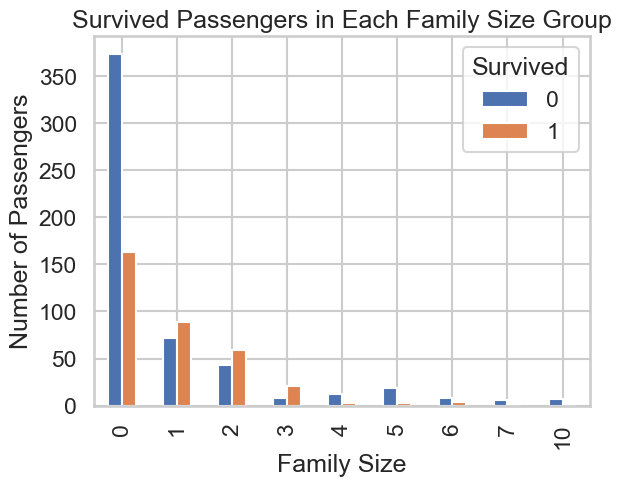

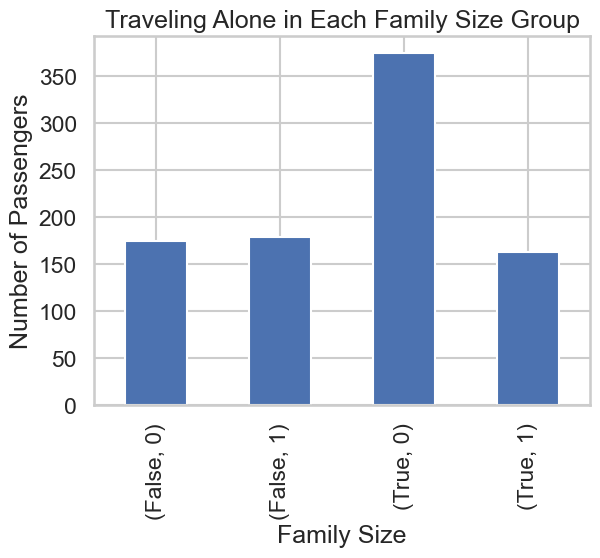

In [14]:
ds['Family_size'] = ds['Parch'] + ds['SibSp'] 

ds['Alone'] = (ds['Family_size'] == 0)

family_size_counts = ds.groupby(['Family_size', 'Survived']).size()

family_size_counts.unstack().plot(kind='bar')
plt.title('Survived Passengers in Each Family Size Group')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.show()

alone = ds.groupby(['Alone', 'Survived']).size()

alone.plot(kind='bar')
plt.title('Traveling Alone in Each Family Size Group')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.show()

Ваші висновки:

Найбільше вижило людей які подорожували самі без родини. Більшість людей які були з кимось одним, двома або трьома родичами - загинули. Це означає, що виживання пасажирів суттєво залежить від того скільки родичів подорожує з ними.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [16]:
dataset_drop = ds.drop(["Cabin", "Ticket", "PassengerId"], axis="columns")

Ваші висновки:

Ці атрибути мають забагато пропущених значень, які не будуть впливати на подальший аналіз даних, або вони просто не містять потрібної важливої інформації.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [17]:
num_val = ds.copy()

num_val["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in num_val["Name"]]

titles_map = {title: idx for idx, title in enumerate(num_val['Title'].unique())}

num_val["Title"] = num_val["Title"].map(titles_map)

sex_map = {"female": 1, "male": 0}
embarked_map = {"S": 0, "Q": 1, "C": 2}

num_val["Sex"] = num_val["Sex"].map(sex_map)
num_val["Embarked"] = num_val["Embarked"].map(embarked_map)

display(num_val)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,fare_quartile,Family_size,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,Q1,1,False,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,2,Q4,1,False,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,Q2,0,True,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2,Q4,1,False,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,2,Q2,0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0,1,Q2,0,True,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0,1,Q3,0,True,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,1,2,W./C. 6607,23.4500,NaN,0.0,1,Q3,3,False,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0,1,Q3,0,True,0


Ваші висновки:

Отже усі значення гендеру, які відповідають 0 - це чоловіки, усі 1 - це жінки. Якщо людина зайшла на паром в першому порту(S), то її число буде відображати індекс 0, відповідно в 2 порту(Q) індекс 1, і в 3(C) - 2. Код створює словник титулів, де кожен з них має свій індекс, наприклад Mr. - 0, Mrs. - 1, Miss - 2 і так далі.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



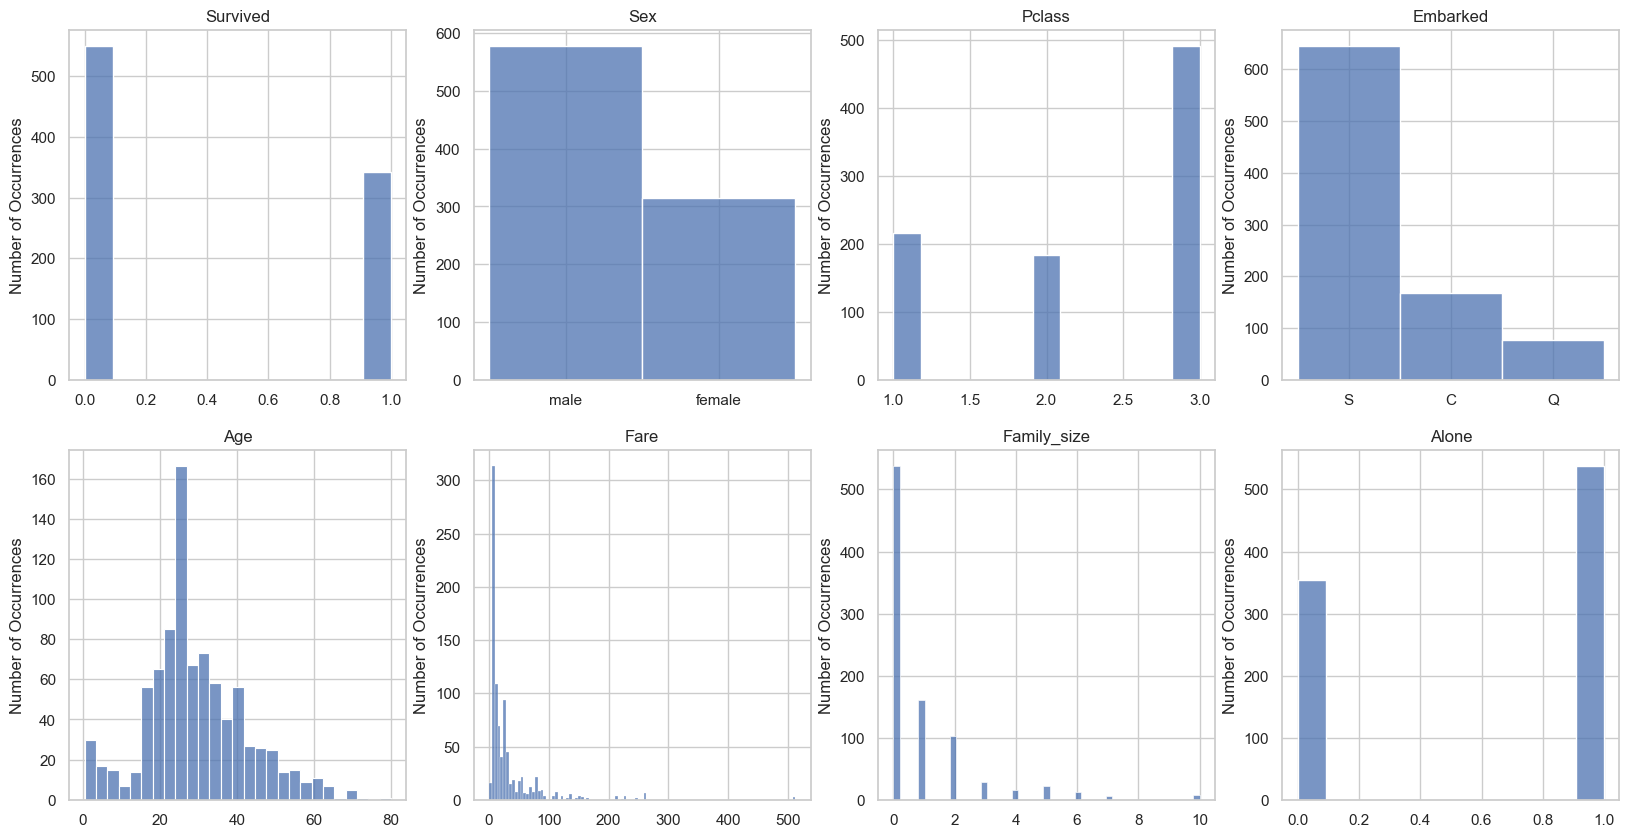

In [18]:
categories = ['Survived', 'Sex', 'Pclass', 'Embarked', 'Age', 'Fare', 'Family_size', 'Alone']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, variable in enumerate(categories):
    sns.histplot(ds[variable], kde=False, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(variable)
    axes[i//4, i%4].set_xlabel('')
    axes[i//4, i%4].set_ylabel('Number of Occurrences')
plt.show()

Ваші висновки:

Категорія виживших містить дані про кількість виживших і загиблих, як бачимо загиблих більше за 500, а виживших приблизно 350.\ Друга категорія гендеру показує що кількість чоловіків вища за 550, а жінок трохи більше за 300. \ Майже 500 людей мали квитки 3 класу, майже 200 людей мали квитки 2 класу, а перший клас купили трохи більше як 200 людей. \ 4-й графік показує, що найбільше людей зайшли на першому порті - 600+ людей, на інших двух портах зайшло разом приблизно 250 людей. \ Графік з віком показує що найбільше людей мали вік трохи за 20, а найменше на борту було літніх людей. \ Графік вартості квитків показує що більшість мали вартість від 0 до 100 доларів, найдорожчий коштував більше ніж 500 доларів. \ Найбільше людей подорожувало без родичів - майже 550. Решта 350 мали хоча б 1 родича на борту.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

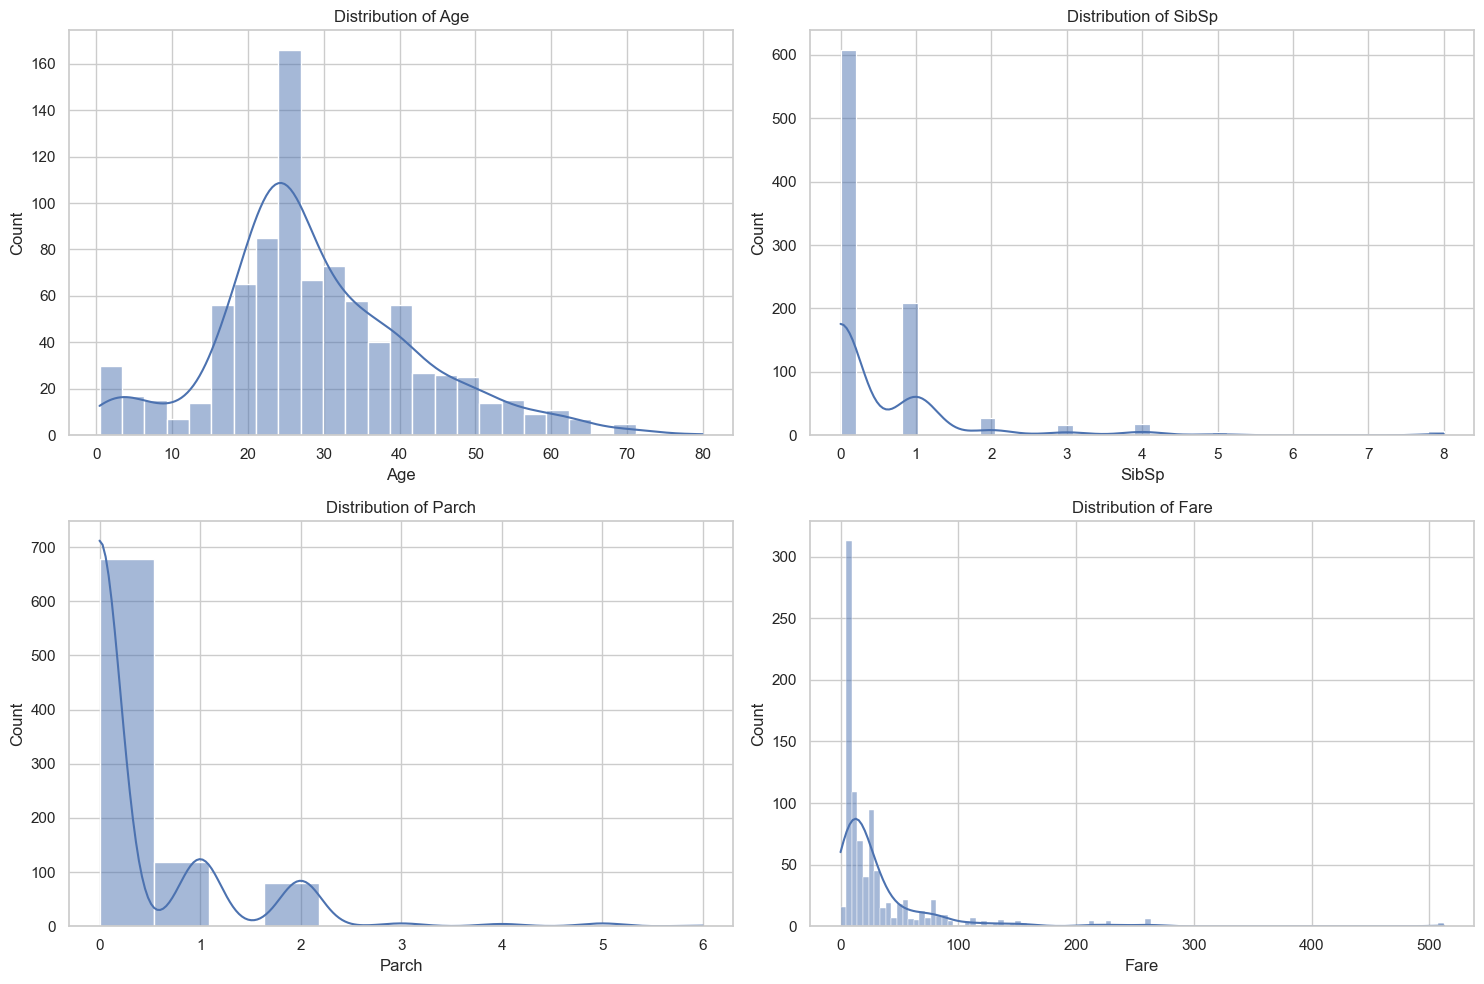

In [21]:

num_variables_ds = ds[['Age', 'SibSp', 'Parch', 'Fare']]
num_variables = ['Age', 'SibSp', 'Parch', 'Fare']

num_cols = len(num_variables)
fig, axes = plt.subplots(nrows=2, ncols=num_cols // 2 + num_cols % 2, figsize=(15, 10))

for i, col in enumerate(num_variables):
    sns.histplot(data=num_val, x=col, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Ваші висновки:

Графік з віком має нормальний розподіл, багато кому було 20-40 років. \ Другий і третій графіки мають щось схоже до Експоненціальний розподілу. \ Графік вартості квитків нагадує бета-розподіл або логнормальний розподіл. 

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

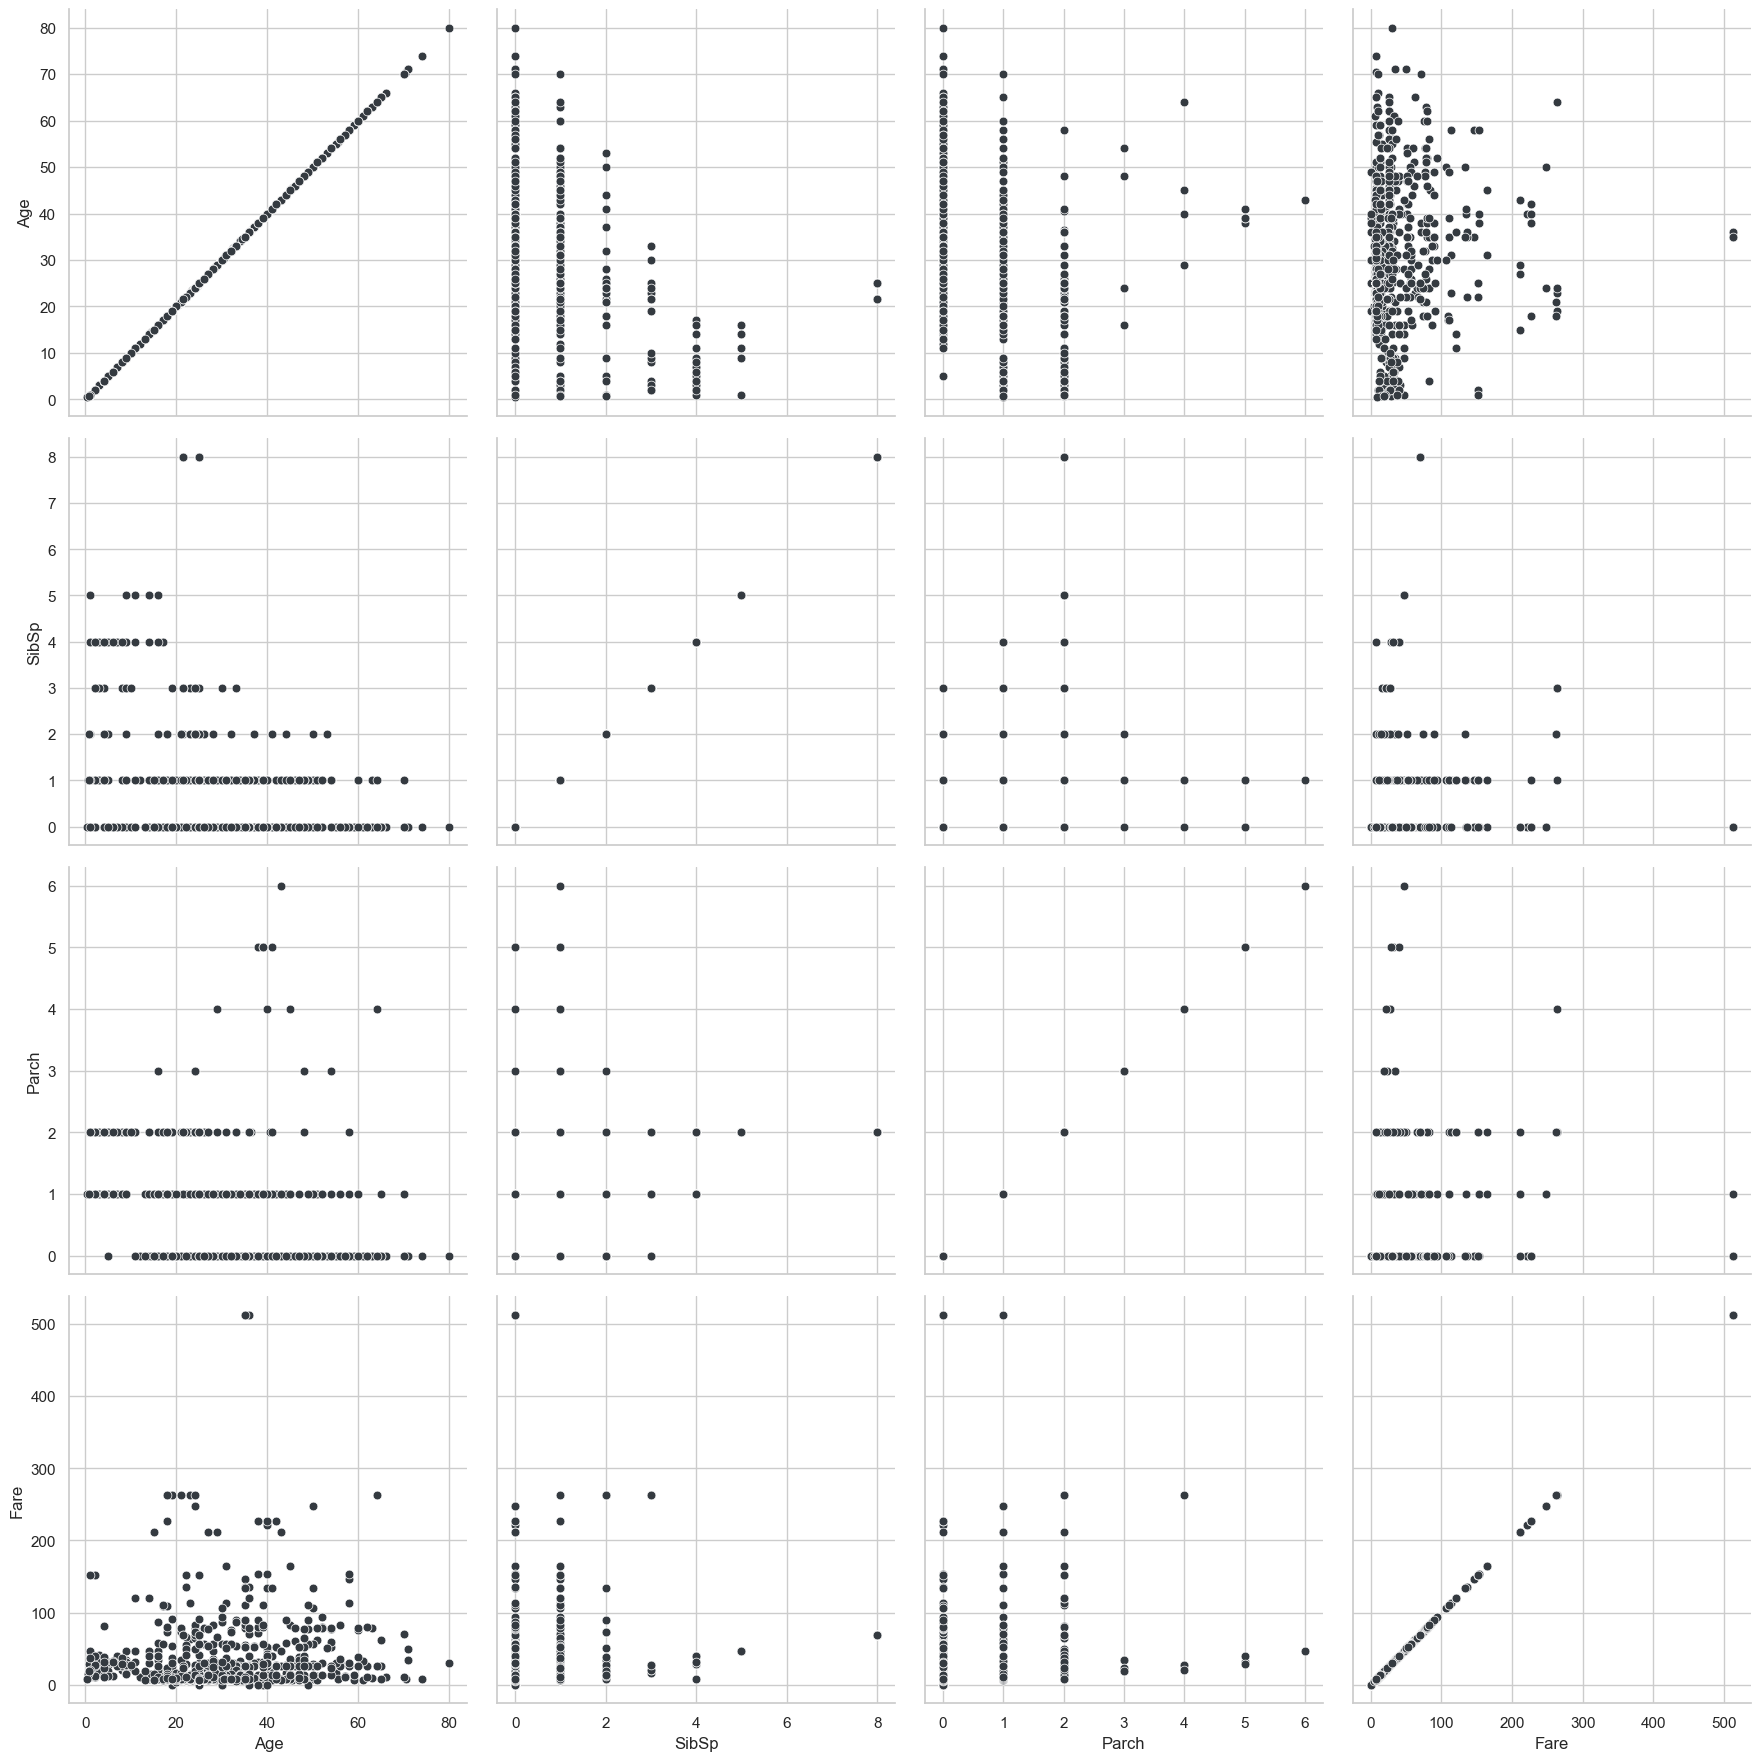

In [26]:
numerical_matrix = sns.PairGrid(num_variables_ds, height=4.5)
numerical_matrix.map(sns.scatterplot, color='#343a40', s=40)

plt.show()

Ваші висновки:

**Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.**

Вік: Пасажири зазвичай молодші, якщо у них менше родичів на борту. Це може бути через те, що молоді люди частіше подорожують без сім'ї. Викиди на графіку показують деякі незвичайні випадки, які можуть спотворити загальний аналіз.

Кількість родичів: Ці атрибути мають взаємозв'язок, оскільки вони визначають розмір сім'ї. Спостерігаються деякі аномалії в цих даних, які варто розглянути окремо.

Вартість квитка: Пасажири з більшою кількістю дітей/батьків частіше мають дешеві квитки. Це може бути зв'язано з фінансовим обмеженням у бюджеті на подорож для багатодітних сімей. Також виявлені викиди в цих даних, що потребують уваги.